**1️⃣ IMPOR LIBRARY**

In [ ]:
# ============================================
# 1. IMPORT LIBRARY
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

2️⃣ **DESKRIPSI DATASET**

In [ ]:
# ============================================
# 2. LOAD DAN DESKRIPSI DATASET
# ============================================

# Load dataset
df = pd.read_csv('iris.csv')

print("=" * 60)
print("DESKRIPSI DATASET IRIS")
print("=" * 60)

# 1. Informasi dasar dataset
print("\n1. INFORMASI DASAR:")
print(f"   • Jumlah record: {df.shape[0]}")
print(f"   • Jumlah atribut: {df.shape[1]}")
print(f"   • Nama kolom: {list(df.columns)}")

# 2. Tipe data
print("\n2. TIPE DATA:")
print(df.dtypes.to_string())

# 3. Statistik dasar
print("\n3. STATISTIK DESKRIPTIF:")
print(df.describe().round(2).to_string())

# 4. Informasi label/target
print("\n4. DISTRIBUSI TARGET (species):")
species_counts = df['species'].value_counts()
print(species_counts.to_string())
print(f"\n   • Jumlah kelas: {len(species_counts)}")
print(f"   • Kelas: {list(species_counts.index)}")
print(f"   • Dataset {'seimbang' if len(set(species_counts)) == 1 else 'tidak seimbang'}")

# 5. Cek missing values
print("\n5. CEK MISSING VALUES:")
print(f"   • Total missing values: {df.isnull().sum().sum()}")
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum().to_string())
else:
    print("   ✓ Tidak ada missing values")

# 6. Cek duplikat
print("\n6. CEK DUPLIKAT:")
print(f"   • Jumlah duplikat: {df.duplicated().sum()}")

DESKRIPSI DATASET IRIS

1. INFORMASI DASAR:
   • Jumlah record: 150
   • Jumlah atribut: 5
   • Nama kolom: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

2. TIPE DATA:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object

3. STATISTIK DESKRIPTIF:
       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.05          3.76         1.20
std            0.83         0.43          1.76         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50

4. DISTRIBUSI TARGET (species):
species
setosa        50
versicolor    50
virginica     50

   • Jumlah kelas: 3
   

3️⃣ **PREPROCESSING DATA**

In [ ]:
# ============================================
# 3. PREPROCESSING DATA
# ============================================

print("\n" + "=" * 60)
print("PREPROCESSING DATA")
print("=" * 60)

# Copy dataframe untuk preprocessing
df_processed = df.copy()

# 1. Encoding label kategorikal
print("\n1. ENCODING LABEL:")
le = LabelEncoder()
df_processed['species_encoded'] = le.fit_transform(df['species'])
print(f"   • Mapping label: {dict(zip(le.classes_, le.transform(le.classes_)))}")
print(f"   • Contoh data setelah encoding:")
print(df_processed[['species', 'species_encoded']].head(5).to_string(index=False))

# 2. Pisahkan features dan target
X = df_processed.drop(['species', 'species_encoded'], axis=1)
y = df_processed['species_encoded']

print("\n2. PEMISAHAN FEATURES DAN TARGET:")
print(f"   • Features shape: {X.shape}")
print(f"   • Target shape: {y.shape}")

# 3. Scaling/Normalization
print("\n3. STANDARDIZATION (SCALING):")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("   • Sebelum scaling (5 sample pertama):")
print(X.head().to_string())
print("\n   • Setelah scaling (5 sample pertama):")
print(pd.DataFrame(X_scaled[:5], columns=X.columns).to_string(index=False))

# 4. Split data train-test
print("\n4. SPLIT DATA TRAIN-TEST:")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"   • Training set: {X_train.shape[0]} sampel ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Test set: {X_test.shape[0]} sampel ({X_test.shape[0]/len(X)*100:.1f}%)")

# Distribusi kelas di train dan test
print("\n   • Distribusi kelas di Training set:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for i, count in enumerate(train_dist):
    species_name = le.inverse_transform([i])[0]
    print(f"     - {species_name}: {count} sampel ({count/len(y_train)*100:.1f}%)")

print("\n   • Distribusi kelas di Test set:")
test_dist = pd.Series(y_test).value_counts().sort_index()
for i, count in enumerate(test_dist):
    species_name = le.inverse_transform([i])[0]
    print(f"     - {species_name}: {count} sampel ({count/len(y_test)*100:.1f}%)")


PREPROCESSING DATA

1. ENCODING LABEL:
   • Mapping label: {'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}
   • Contoh data setelah encoding:
species  species_encoded
 setosa                0
 setosa                0
 setosa                0
 setosa                0
 setosa                0

2. PEMISAHAN FEATURES DAN TARGET:
   • Features shape: (150, 4)
   • Target shape: (150,)

3. STANDARDIZATION (SCALING):
   • Sebelum scaling (5 sample pertama):
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

   • Setelah scaling (5 sample pertama):
 sepal_length  sepal_width  petal_length  petal_width
    -0.900681     1.032057     -1.341272    -1.312977
    -1.143017    -0.124958   

5️⃣ **PEMILIHAN DAN PENERAPAN ALGORITMA**


PEMILIHAN DAN PENERAPAN ALGORITMA

1. TRAINING MODEL:
----------------------------------------

   Training Decision Tree...
   ✓ Selesai dalam 0.0039 detik
   • Accuracy (train): 1.0000
   • Accuracy (test):  0.9000

   Training KNN...
   ✓ Selesai dalam 0.0097 detik
   • Accuracy (train): 0.9667
   • Accuracy (test):  0.9333

   Training Random Forest...
   ✓ Selesai dalam 0.2717 detik
   • Accuracy (train): 1.0000
   • Accuracy (test):  0.9333

   Training SVM...
   ✓ Selesai dalam 0.0028 detik
   • Accuracy (train): 0.9750
   • Accuracy (test):  1.0000

2. HASIL PERBANDINGAN MODEL:
----------------------------------------
        Model  Training Time  Train Accuracy  Test Accuracy  Precision  Recall  F1-Score
Decision Tree         0.0039          1.0000         0.9000     0.9024  0.9000    0.8997
          KNN         0.0097          0.9667         0.9333     0.9444  0.9333    0.9327
Random Forest         0.2717          1.0000         0.9333     0.9333  0.9333    0.9333
         

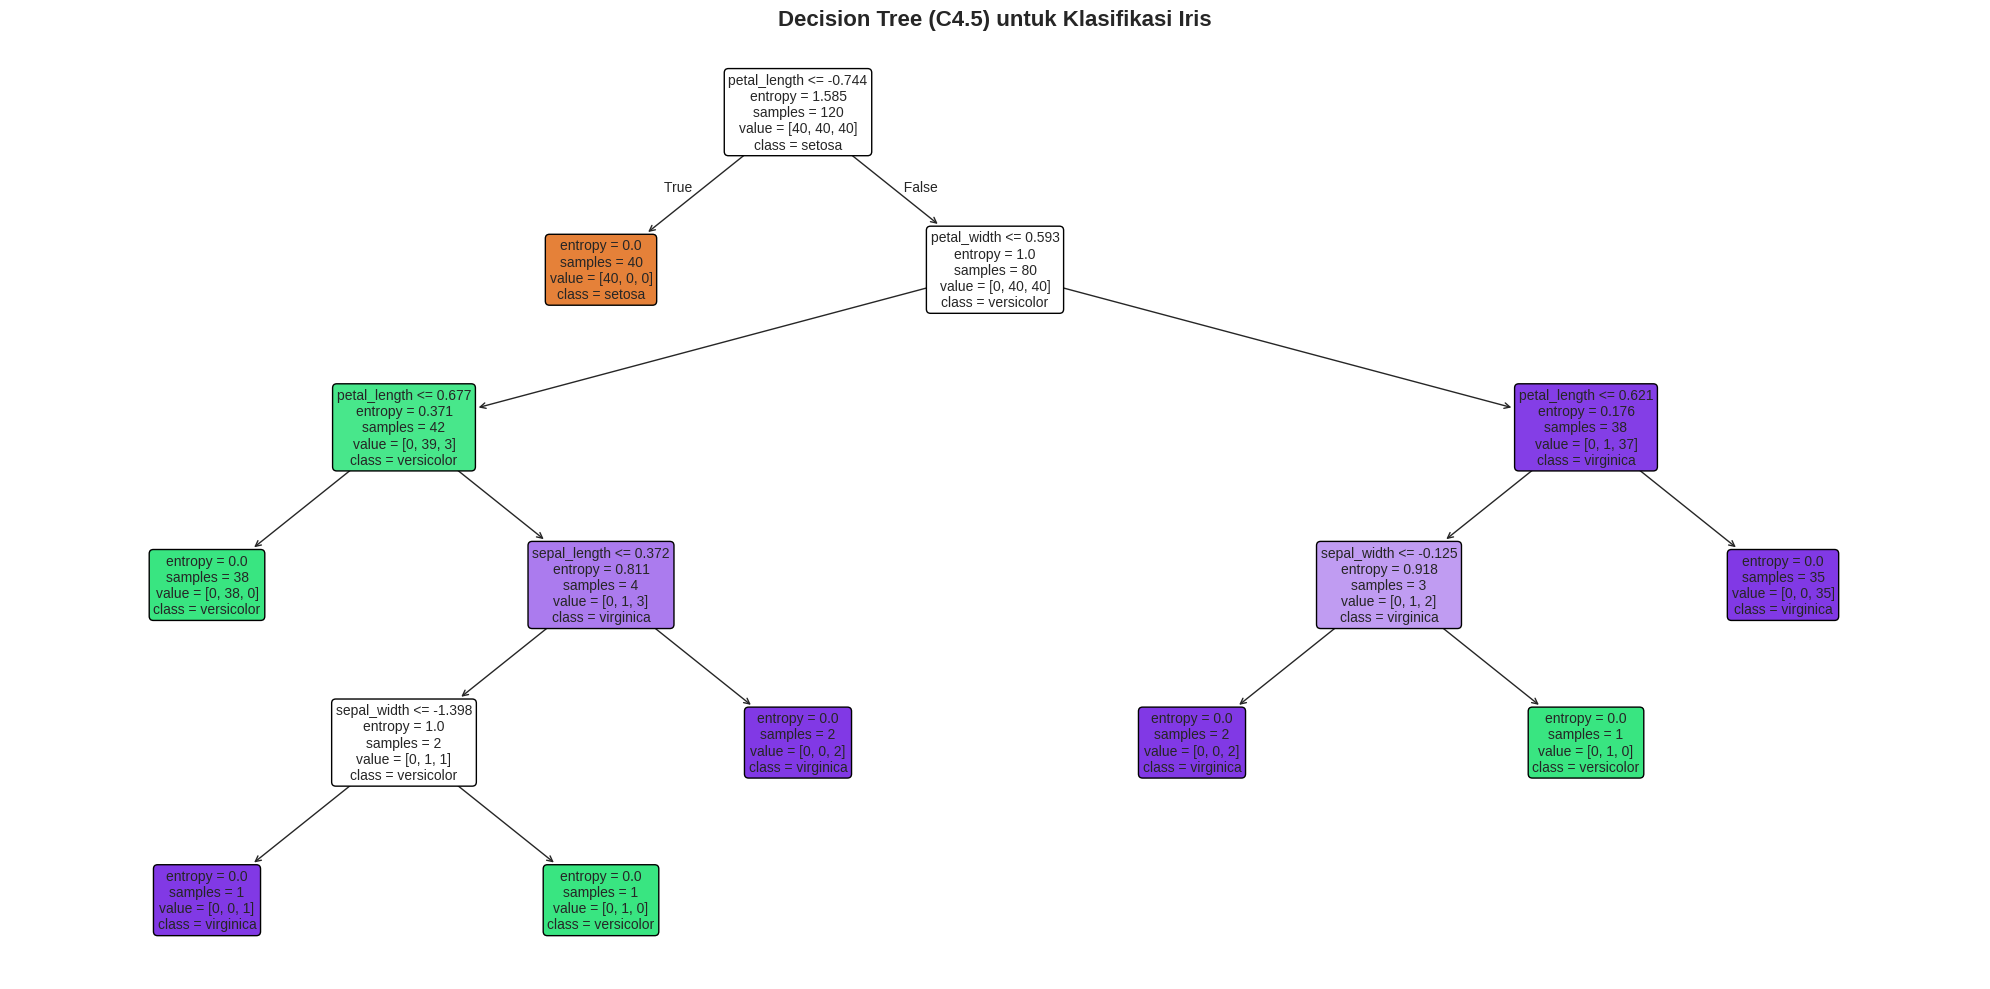

   ✓ Decision Tree disimpan sebagai 'decision_tree.png'

4. FEATURE IMPORTANCE:
----------------------------------------
   • Decision Tree Feature Importance:
     Feature  Importance (Decision Tree)
petal_length                    0.664888
 petal_width                    0.303565
 sepal_width                    0.025000
sepal_length                    0.006546

   • Random Forest Feature Importance:
     Feature  Importance (Random Forest)
 petal_width                    0.437185
petal_length                    0.431466
sepal_length                    0.116349
 sepal_width                    0.015000


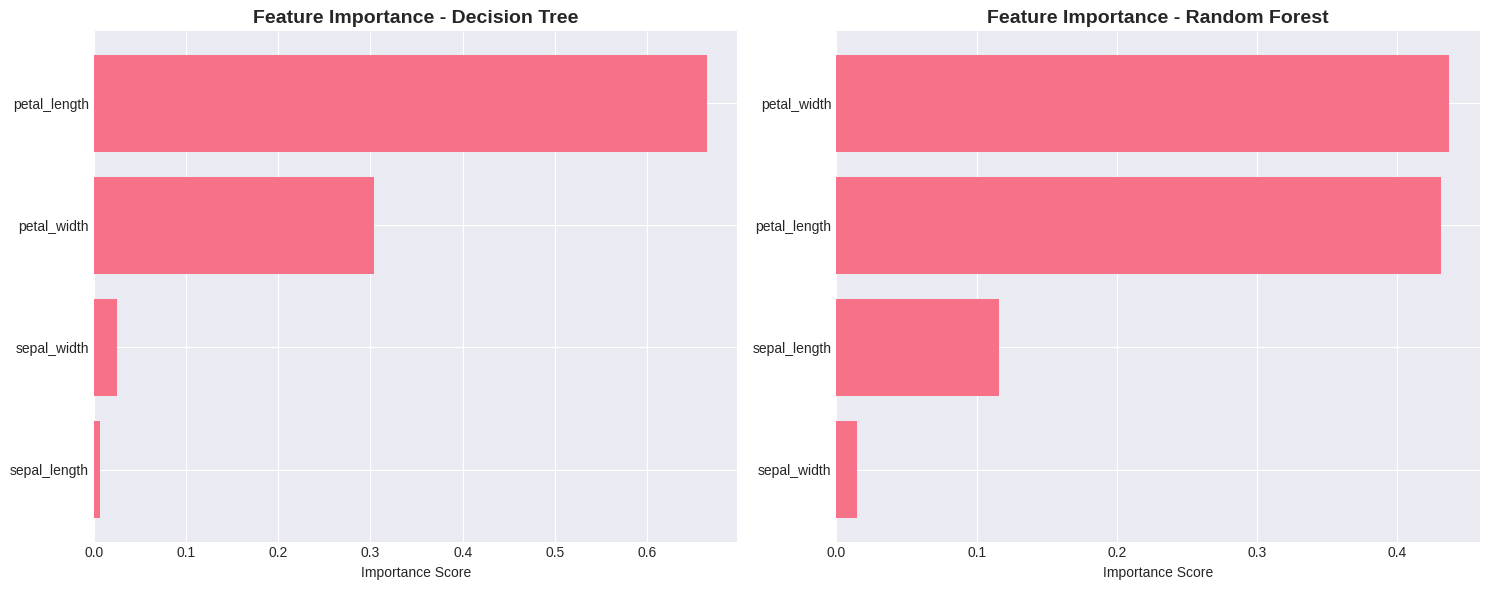

   ✓ Feature Importance disimpan sebagai 'feature_importance.png'


In [ ]:
# ============================================
# 5. PEMILIHAN DAN PENERAPAN ALGORITMA
# ============================================

print("\n" + "=" * 60)
print("PEMILIHAN DAN PENERAPAN ALGORITMA")
print("=" * 60)

# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, criterion='entropy'),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, kernel='linear')
}

# Dictionary untuk menyimpan hasil
results = {
    'Model': [],
    'Training Time': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Dictionary untuk menyimpan model yang sudah ditrain
trained_models = {}

print("\n1. TRAINING MODEL:")
print("-" * 40)

import time

for name, model in models.items():
    print(f"\n   Training {name}...")

    # Training dengan timing
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Simpan hasil
    results['Model'].append(name)
    results['Training Time'].append(round(training_time, 4))
    results['Train Accuracy'].append(round(train_acc, 4))
    results['Test Accuracy'].append(round(test_acc, 4))
    results['Precision'].append(round(precision, 4))
    results['Recall'].append(round(recall, 4))
    results['F1-Score'].append(round(f1, 4))

    # Simpan model yang sudah ditrain
    trained_models[name] = model

    print(f"   ✓ Selesai dalam {training_time:.4f} detik")
    print(f"   • Accuracy (train): {train_acc:.4f}")
    print(f"   • Accuracy (test):  {test_acc:.4f}")

# Konversi hasil ke DataFrame
results_df = pd.DataFrame(results)

print("\n2. HASIL PERBANDINGAN MODEL:")
print("-" * 40)
print(results_df.to_string(index=False))

# Visualisasi Decision Tree
print("\n3. VISUALISASI DECISION TREE:")
dt_model = trained_models['Decision Tree']
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree (C4.5) untuk Klasifikasi Iris", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Decision Tree disimpan sebagai 'decision_tree.png'")

# Feature Importance untuk Decision Tree dan Random Forest
print("\n4. FEATURE IMPORTANCE:")
print("-" * 40)

# Decision Tree Feature Importance
dt_importance = dt_model.feature_importances_
dt_feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance (Decision Tree)': dt_importance
}).sort_values('Importance (Decision Tree)', ascending=False)

print("   • Decision Tree Feature Importance:")
print(dt_feature_df.to_string(index=False))

# Random Forest Feature Importance
rf_model = trained_models['Random Forest']
rf_importance = rf_model.feature_importances_
rf_feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance (Random Forest)': rf_importance
}).sort_values('Importance (Random Forest)', ascending=False)

print("\n   • Random Forest Feature Importance:")
print(rf_feature_df.to_string(index=False))

# Visualisasi Feature Importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Decision Tree Feature Importance
ax1.barh(dt_feature_df['Feature'], dt_feature_df['Importance (Decision Tree)'])
ax1.set_xlabel('Importance Score')
ax1.set_title('Feature Importance - Decision Tree', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Random Forest Feature Importance
ax2.barh(rf_feature_df['Feature'], rf_feature_df['Importance (Random Forest)'])
ax2.set_xlabel('Importance Score')
ax2.set_title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Feature Importance disimpan sebagai 'feature_importance.png'")

6️⃣ **PENGUJIAN DAN EVALUASI MODEL**


PENGUJIAN DAN EVALUASI MODEL

1. CONFUSION MATRIX:
----------------------------------------


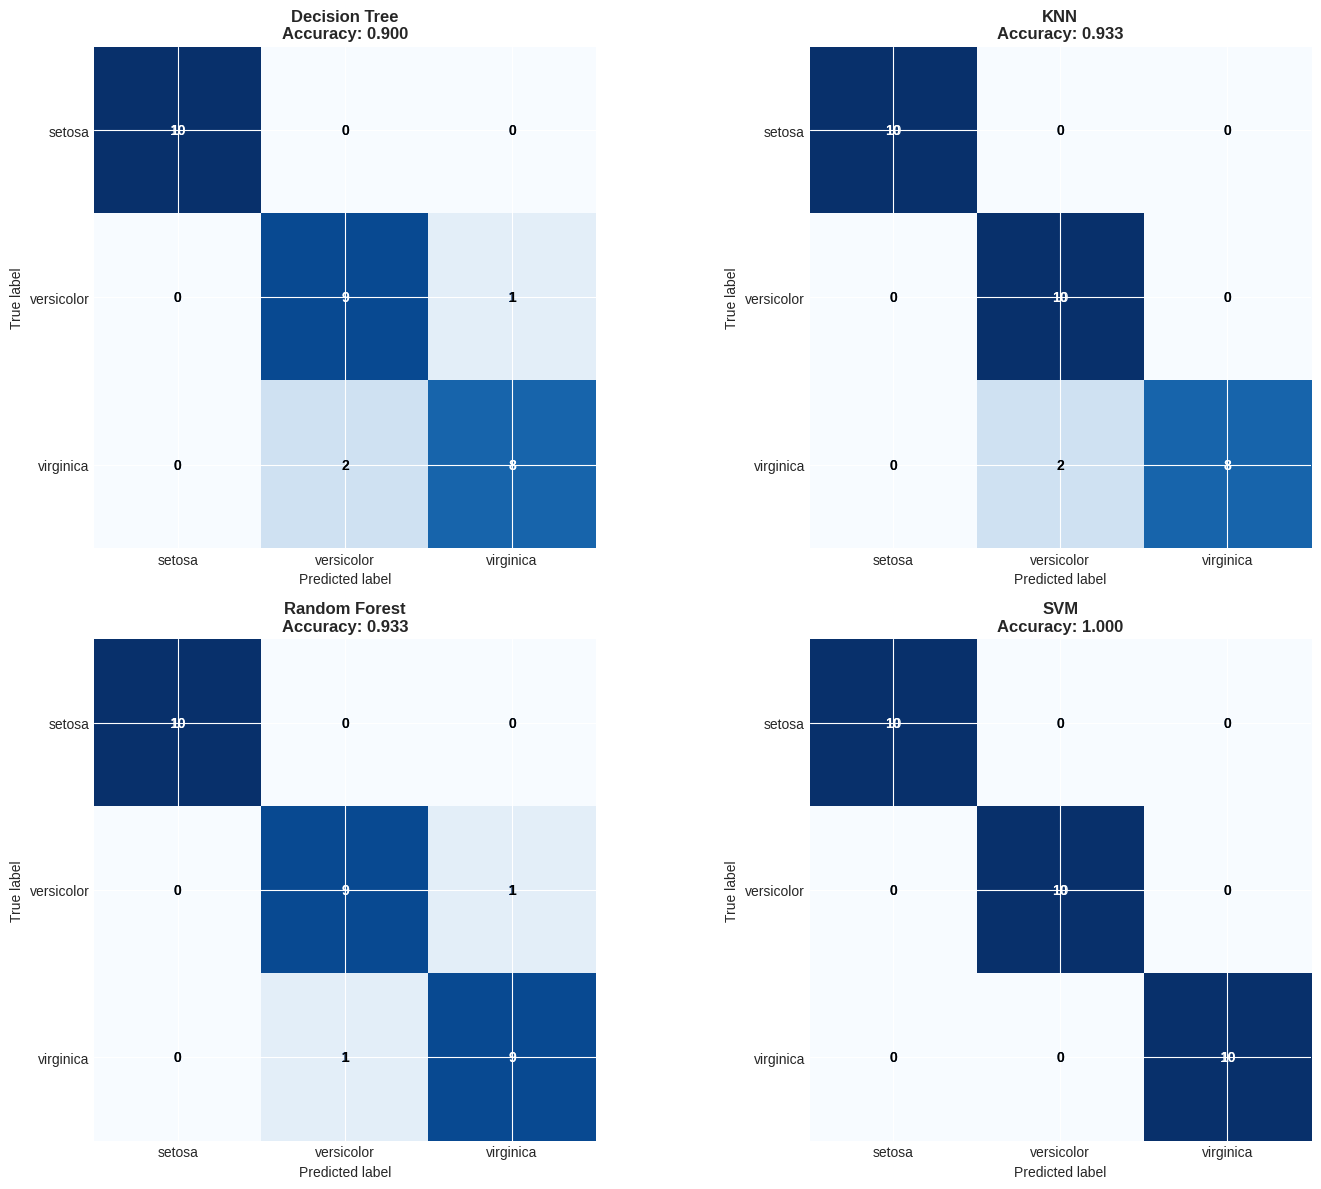

   ✓ Confusion Matrices disimpan sebagai 'confusion_matrices.png'

2. CLASSIFICATION REPORT (DECISION TREE):
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


3. CROSS-VALIDATION SCORES:
----------------------------------------
               Mean CV Accuracy  Std CV Accuracy  Min CV Accuracy  Max CV Accuracy
Decision Tree            0.9533           0.0427           0.8667              1.0
KNN                      0.9533           0.0670           0.8000              1.0
Random Forest            0.9600           0.0327           0.9333              1.0
SVM                      0.9667           0.

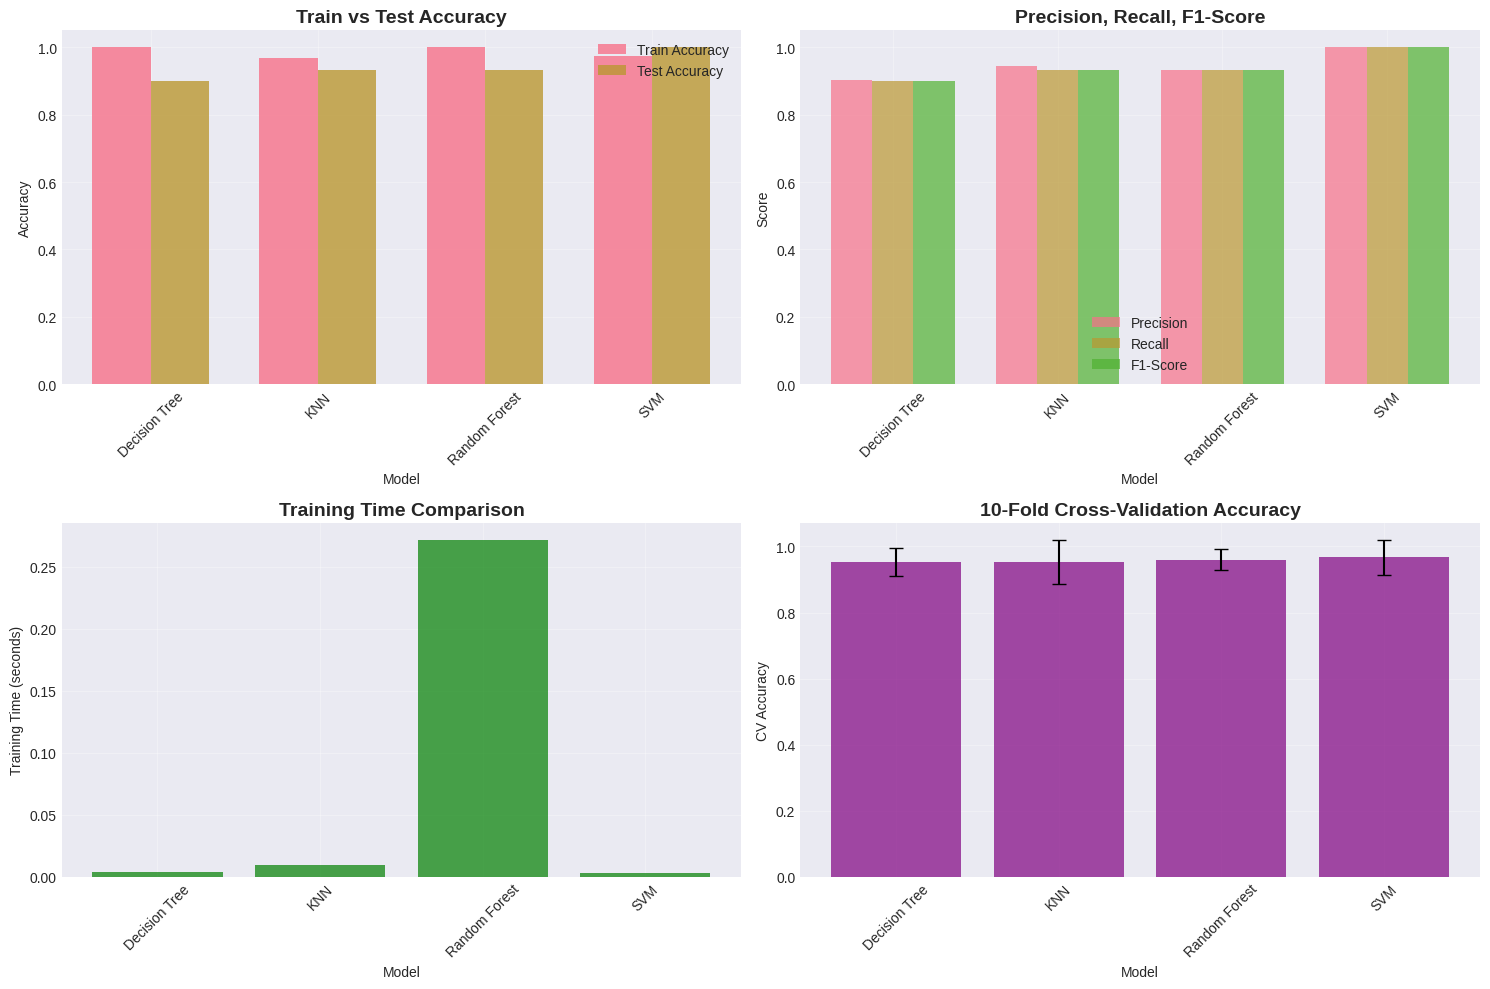

   ✓ Model Comparison disimpan sebagai 'model_comparison.png'

5. TABEL HASIL LENGKAP:
----------------------------------------
        Model Training Time Train Accuracy Test Accuracy Precision Recall F1-Score Mean CV Acc Std CV Acc
Decision Tree       0.0039s         1.0000        0.9000    0.9024 0.9000   0.8997      0.9533     0.0427
          KNN       0.0097s         0.9667        0.9333    0.9444 0.9333   0.9327      0.9533     0.0670
Random Forest       0.2717s         1.0000        0.9333    0.9333 0.9333   0.9333      0.9600     0.0327
          SVM       0.0028s         0.9750        1.0000    1.0000 1.0000   1.0000      0.9667     0.0537


In [ ]:
# ============================================
# 6. PENGUJIAN DAN EVALUASI MODEL
# ============================================

print("\n" + "=" * 60)
print("PENGUJIAN DAN EVALUASI MODEL")
print("=" * 60)

# 1. Confusion Matrix untuk setiap model
print("\n1. CONFUSION MATRIX:")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f'{name}\nAccuracy: {results_df.loc[idx, "Test Accuracy"]:.3f}',
                       fontsize=12, fontweight='bold')

    # Tambah nilai di setiap sel
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[idx].text(j, i, str(cm[i, j]),
                          ha='center', va='center',
                          color='white' if cm[i, j] > cm.max()/2 else 'black',
                          fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Confusion Matrices disimpan sebagai 'confusion_matrices.png'")

# 2. Classification Report untuk Decision Tree (model terpilih)
print("\n2. CLASSIFICATION REPORT (DECISION TREE):")
print("-" * 40)

dt_model = trained_models['Decision Tree']
y_pred_dt = dt_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

# 3. Cross-Validation untuk evaluasi lebih robust
print("\n3. CROSS-VALIDATION SCORES:")
print("-" * 40)

cv_results = {}
for name, model in trained_models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')
    cv_results[name] = {
        'Mean CV Accuracy': round(cv_scores.mean(), 4),
        'Std CV Accuracy': round(cv_scores.std(), 4),
        'Min CV Accuracy': round(cv_scores.min(), 4),
        'Max CV Accuracy': round(cv_scores.max(), 4)
    }

cv_df = pd.DataFrame(cv_results).T
print(cv_df.to_string())

# 4. Visualisasi perbandingan model
print("\n4. VISUALISASI PERBANDINGAN MODEL:")
print("-" * 40)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Bar plot untuk accuracy
models_list = results_df['Model']
train_acc = results_df['Train Accuracy']
test_acc = results_df['Test Accuracy']

x = np.arange(len(models_list))
width = 0.35

ax1.bar(x - width/2, train_acc, width, label='Train Accuracy', alpha=0.8)
ax1.bar(x + width/2, test_acc, width, label='Test Accuracy', alpha=0.8)
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
ax1.set_title('Train vs Test Accuracy', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models_list, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bar plot untuk precision, recall, f1-score
metrics = ['Precision', 'Recall', 'F1-Score']
x = np.arange(len(models_list))
width = 0.25

for i, metric in enumerate(metrics):
    values = results_df[metric]
    ax2.bar(x + i*width - width, values, width, label=metric, alpha=0.7)

ax2.set_xlabel('Model')
ax2.set_ylabel('Score')
ax2.set_title('Precision, Recall, F1-Score', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models_list, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Training time comparison
ax3.bar(models_list, results_df['Training Time'], alpha=0.7, color='green')
ax3.set_xlabel('Model')
ax3.set_ylabel('Training Time (seconds)')
ax3.set_title('Training Time Comparison', fontsize=14, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Cross-validation scores
cv_means = [cv_results[model]['Mean CV Accuracy'] for model in models_list]
cv_stds = [cv_results[model]['Std CV Accuracy'] for model in models_list]

ax4.bar(models_list, cv_means, yerr=cv_stds, alpha=0.7, capsize=5, color='purple')
ax4.set_xlabel('Model')
ax4.set_ylabel('CV Accuracy')
ax4.set_title('10-Fold Cross-Validation Accuracy', fontsize=14, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Model Comparison disimpan sebagai 'model_comparison.png'")

# 5. Tabel hasil lengkap
print("\n5. TABEL HASIL LENGKAP:")
print("-" * 40)

# Gabungkan hasil
final_results_df = results_df.copy()
final_results_df['Mean CV Acc'] = cv_means
final_results_df['Std CV Acc'] = cv_stds

# Format untuk display yang lebih baik
display_df = final_results_df.copy()
display_df['Training Time'] = display_df['Training Time'].apply(lambda x: f"{x:.4f}s")
for col in ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'Mean CV Acc', 'Std CV Acc']:
    display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")

print(display_df.to_string(index=False))

7️⃣ **HYPERPARAMETER TUNING**


HYPERPARAMETER TUNING - DECISION TREE

1. GRID SEARCH CV UNTUK DECISION TREE:
----------------------------------------
   Melakukan Grid Search...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

   Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
   Best Cross-Validation Score: 0.9583
   Test Accuracy dengan Best Model: 0.9333

2. FEATURE IMPORTANCE (MODEL TERBAIK):
----------------------------------------
     Feature  Importance
petal_length    0.551867
 petal_width    0.448133
 sepal_width    0.000000
sepal_length    0.000000


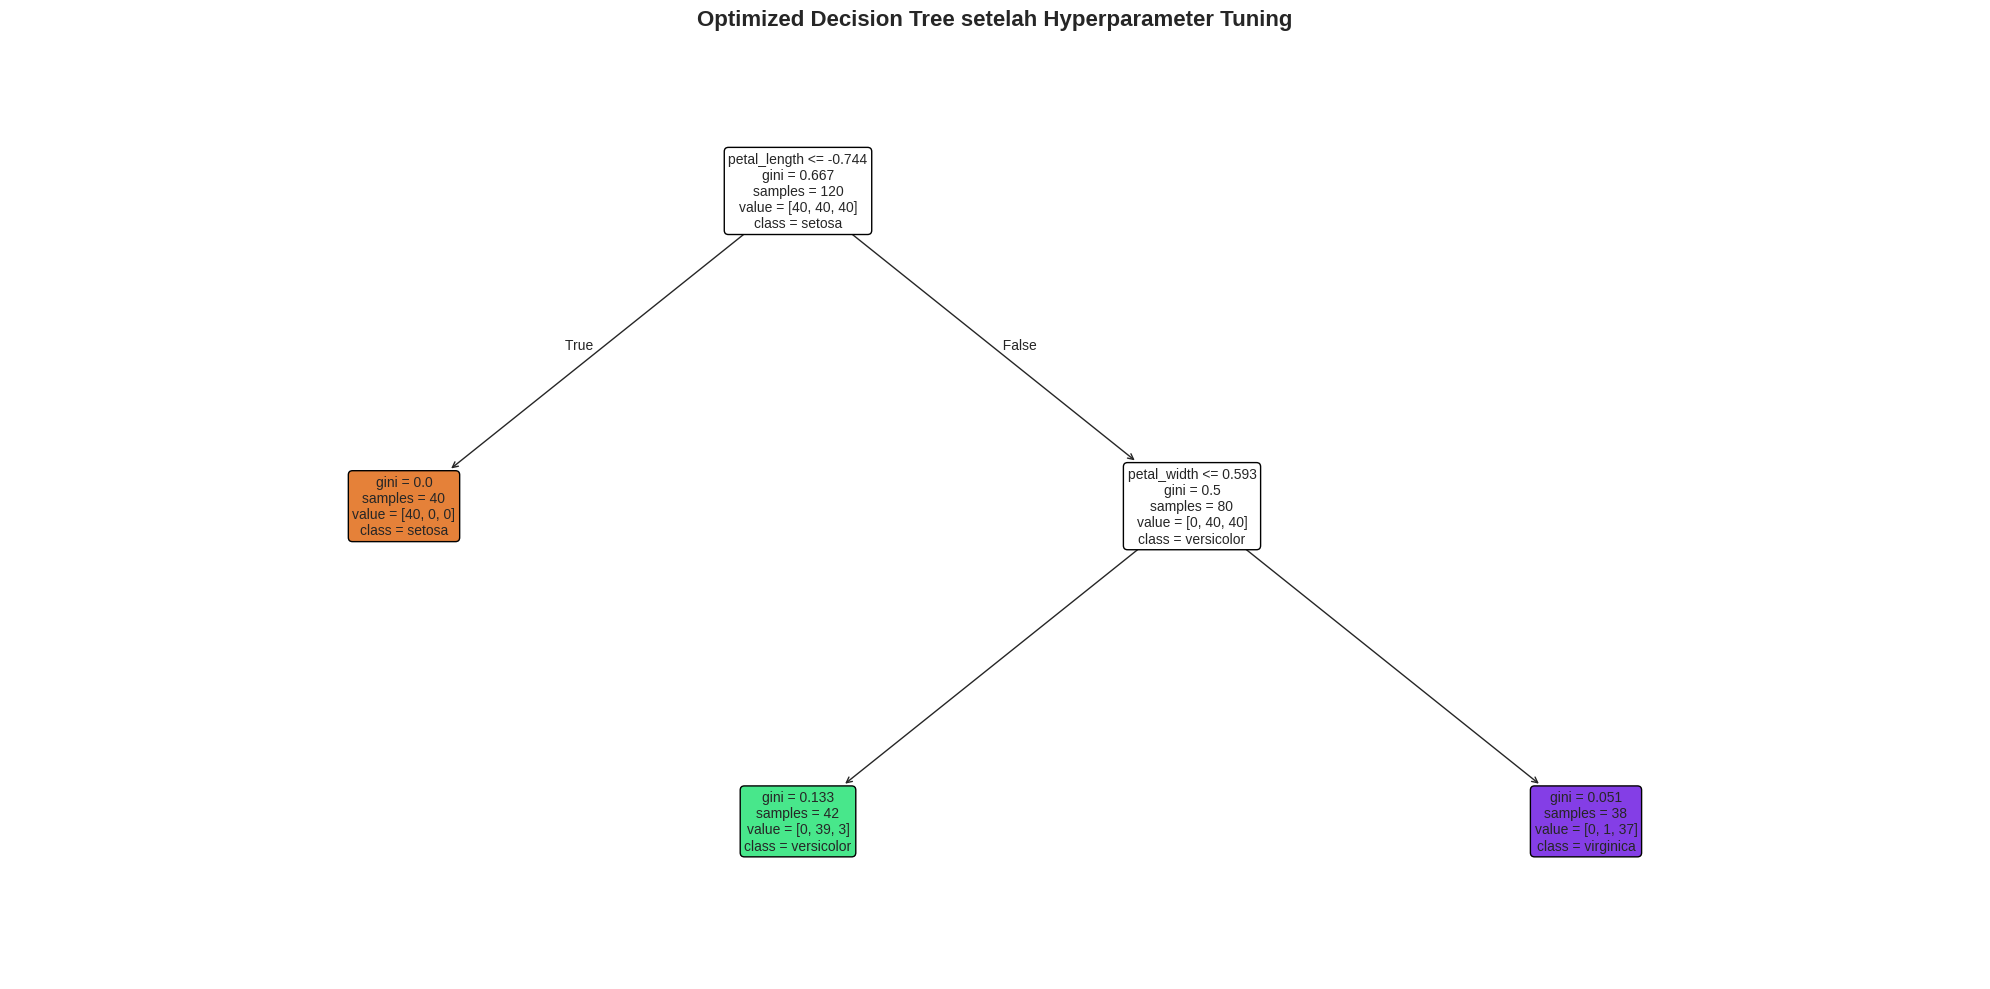

   ✓ Optimized Decision Tree disimpan sebagai 'optimized_decision_tree.png'


In [ ]:
# ============================================
# 7. HYPERPARAMETER TUNING (OPTIONAL)
# ============================================

print("\n" + "=" * 60)
print("HYPERPARAMETER TUNING - DECISION TREE")
print("=" * 60)

# Grid Search untuk Decision Tree
print("\n1. GRID SEARCH CV UNTUK DECISION TREE:")
print("-" * 40)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("   Melakukan Grid Search...")
grid_search.fit(X_train, y_train)

print(f"\n   Best Parameters: {grid_search.best_params_}")
print(f"   Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Evaluasi model terbaik
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"   Test Accuracy dengan Best Model: {best_accuracy:.4f}")

# Feature importance dari model terbaik
print("\n2. FEATURE IMPORTANCE (MODEL TERBAIK):")
print("-" * 40)

best_importance = best_dt.feature_importances_
best_feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_importance
}).sort_values('Importance', ascending=False)

print(best_feature_df.to_string(index=False))

# Visualisasi Decision Tree terbaik
plt.figure(figsize=(20, 10))
plot_tree(best_dt,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Optimized Decision Tree setelah Hyperparameter Tuning",
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('optimized_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Optimized Decision Tree disimpan sebagai 'optimized_decision_tree.png'")

8️⃣ **PREDIKSI DAN APLIKASI**

In [ ]:
# ============================================
# 8. PREDIKSI DAN APLIKASI MODEL
# ============================================

print("\n" + "=" * 60)
print("PREDIKSI DAN APLIKASI MODEL")
print("=" * 60)

# 1. Prediksi pada data test
print("\n1. CONTOH PREDIKSI PADA DATA TEST:")
print("-" * 40)

# Ambil 10 sampel dari test set untuk demo
sample_indices = np.random.choice(range(len(X_test)), 10, replace=False)
X_sample = X_test[sample_indices]

# Perbaikan: Akses y_test dengan cara yang sesuai dengan tipe datanya
# Jika y_test adalah pandas Series, gunakan .iloc
# Jika y_test adalah numpy array, gunakan indexing biasa
if hasattr(y_test, 'iloc'):
    y_sample_true = y_test.iloc[sample_indices]
else:
    y_sample_true = y_test[sample_indices]

# Gunakan Decision Tree model
dt_model = trained_models['Decision Tree']
y_sample_pred = dt_model.predict(X_sample)

# Tampilkan hasil
print("\n   Hasil Prediksi:")
print("   " + "-" * 50)
print("   No. | Sepal L | Sepal W | Petal L | Petal W | True Species | Pred Species | Correct")
print("   " + "-" * 50)

# Perbaikan: Dapatkan indeks asli dari data training untuk mendapatkan data original
# Karena X_test adalah hasil dari scaling, kita perlu mendapatkan indeks asli
# Kita akan menggunakan inverse transform untuk mendapatkan data asli
for i in range(len(sample_indices)):
    # Dapatkan data asli (sebelum scaling) dengan inverse transform
    original_data = scaler.inverse_transform(X_sample[i].reshape(1, -1)).flatten()

    # Dapatkan true species dan pred species
    # Perbaikan: Pastikan kita mengakses nilai dengan benar
    if hasattr(y_sample_true, 'iloc'):
        true_val = y_sample_true.iloc[i] if i < len(y_sample_true) else y_sample_true[i]
    else:
        true_val = y_sample_true[i] if i < len(y_sample_true) else y_sample_true[i]

    true_species = le.inverse_transform([true_val])[0]
    pred_species = le.inverse_transform([y_sample_pred[i]])[0]

    # Tentukan apakah prediksi benar
    is_correct = "✓" if true_val == y_sample_pred[i] else "✗"

    print(f"   {i+1:2d}  | {original_data[0]:6.1f}  | {original_data[1]:6.1f}  | "
          f"{original_data[2]:6.1f}  | {original_data[3]:6.1f}  | "
          f"{true_species:12s} | {pred_species:12s} |   {is_correct}")

print("   " + "-" * 50)

# Hitung akurasi pada sampel ini
# Perbaikan: Bandingkan nilai dengan benar
if hasattr(y_sample_true, 'values'):
    sample_accuracy = np.sum(y_sample_true.values == y_sample_pred) / len(y_sample_true)
else:
    sample_accuracy = np.sum(y_sample_true == y_sample_pred) / len(y_sample_true)
print(f"\n   Akurasi pada 10 sampel ini: {sample_accuracy:.1%}")

# 2. Fungsi prediksi untuk input manual
print("\n2. FUNGSI PREDIKSI UNTUK INPUT MANUAL:")
print("-" * 40)

def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width, model_name='Decision Tree'):
    """
    Memprediksi spesies iris berdasarkan input pengukuran.

    Parameters:
    -----------
    sepal_length : float
        Panjang sepal (cm)
    sepal_width : float
        Lebar sepal (cm)
    petal_length : float
        Panjang petal (cm)
    petal_width : float
        Lebar petal (cm)
    model_name : str
        Nama model yang akan digunakan ('Decision Tree', 'KNN', 'Random Forest', 'SVM')

    Returns:
    --------
    dict : Hasil prediksi dan probabilitas
    """

    if model_name not in trained_models:
        raise ValueError(f"Model {model_name} tidak ditemukan. Pilih dari: {list(trained_models.keys())}")

    # Buat array dari input
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Scale input data
    input_scaled = scaler.transform(input_data)

    # Dapatkan model
    model = trained_models[model_name]

    # Prediksi
    prediction_encoded = model.predict(input_scaled)[0]
    prediction_species = le.inverse_transform([prediction_encoded])[0]

    # Probabilitas (jika model mendukung)
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(input_scaled)[0]
        prob_dict = {le.inverse_transform([i])[0]: float(prob) for i, prob in enumerate(probabilities)}
    else:
        prob_dict = None

    # Feature importance insight
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        feature_importance = dict(zip(X.columns, importance))
    else:
        feature_importance = None

    return {
        'species': prediction_species,
        'species_encoded': int(prediction_encoded),
        'probabilities': prob_dict,
        'feature_importance': feature_importance,
        'model_used': model_name
    }

# Contoh penggunaan fungsi prediksi
print("\n   Contoh penggunaan fungsi predict_iris_species():")
print("   " + "-" * 50)

# Contoh 1: Iris setosa
result1 = predict_iris_species(5.1, 3.5, 1.4, 0.2, 'Decision Tree')
print(f"\n   Contoh 1 (Iris setosa):")
print(f"   Input: sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2")
print(f"   Prediksi: {result1['species']}")
if result1['probabilities']:
    print(f"   Probabilitas:")
    for species, prob in result1['probabilities'].items():
        print(f"     • {species}: {prob:.2%}")

# Contoh 2: Iris versicolor
result2 = predict_iris_species(6.0, 2.7, 4.5, 1.5, 'Decision Tree')
print(f"\n   Contoh 2 (Iris versicolor):")
print(f"   Input: sepal_length=6.0, sepal_width=2.7, petal_length=4.5, petal_width=1.5")
print(f"   Prediksi: {result2['species']}")
if result2['probabilities']:
    print(f"   Probabilitas:")
    for species, prob in result2['probabilities'].items():
        print(f"     • {species}: {prob:.2%}")

# Contoh 3: Iris virginica
result3 = predict_iris_species(6.9, 3.1, 5.4, 2.1, 'Decision Tree')
print(f"\n   Contoh 3 (Iris virginica):")
print(f"   Input: sepal_length=6.9, sepal_width=3.1, petal_length=5.4, petal_width=2.1")
print(f"   Prediksi: {result3['species']}")
if result3['probabilities']:
    print(f"   Probabilitas:")
    for species, prob in result3['probabilities'].items():
        print(f"     • {species}: {prob:.2%}")

# 3. Simpan model untuk deployment
print("\n3. MENYIMPAN MODEL UNTUK DEPLOYMENT:")
print("-" * 40)

import joblib
import pickle

# Simpan model, scaler, dan label encoder
model_artifacts = {
    'model': trained_models['Decision Tree'],
    'scaler': scaler,
    'label_encoder': le,
    'feature_names': list(X.columns),
    'class_names': list(le.classes_)
}

# Simpan menggunakan joblib
joblib.dump(model_artifacts, 'iris_model.joblib')
print("   ✓ Model disimpan sebagai 'iris_model.joblib'")

# Simpan menggunakan pickle (alternatif)
with open('iris_model.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)
print("   ✓ Model disimpan sebagai 'iris_model.pkl'")

# 4. Load model untuk verifikasi
print("\n4. VERIFIKASI MODEL YANG DISIMPAN:")
print("-" * 40)

# Load model
loaded_artifacts = joblib.load('iris_model.joblib')
loaded_model = loaded_artifacts['model']
loaded_scaler = loaded_artifacts['scaler']
loaded_le = loaded_artifacts['label_encoder']

# Test prediksi dengan model yang di-load
test_input = np.array([[5.1, 3.5, 1.4, 0.2]])
test_input_scaled = loaded_scaler.transform(test_input)
prediction = loaded_model.predict(test_input_scaled)
predicted_species = loaded_le.inverse_transform(prediction)[0]

print(f"   Test prediksi dengan model yang di-load:")
print(f"   Input: [5.1, 3.5, 1.4, 0.2]")
print(f"   Prediksi: {predicted_species}")
print("   ✓ Model berhasil di-load dan dapat digunakan untuk prediksi")


PREDIKSI DAN APLIKASI MODEL

1. CONTOH PREDIKSI PADA DATA TEST:
----------------------------------------

   Hasil Prediksi:
   --------------------------------------------------
   No. | Sepal L | Sepal W | Petal L | Petal W | True Species | Pred Species | Correct
   --------------------------------------------------
    1  |    6.9  |    3.1  |    5.1  |    2.3  | virginica    | virginica    |   ✓
    2  |    5.0  |    3.4  |    1.5  |    0.2  | setosa       | setosa       |   ✓
    3  |    6.3  |    3.3  |    4.7  |    1.6  | versicolor   | versicolor   |   ✓
    4  |    6.6  |    2.9  |    4.6  |    1.3  | versicolor   | versicolor   |   ✓
    5  |    6.4  |    2.8  |    5.6  |    2.2  | virginica    | virginica    |   ✓
    6  |    6.1  |    2.6  |    5.6  |    1.4  | virginica    | versicolor   |   ✗
    7  |    4.4  |    3.0  |    1.3  |    0.2  | setosa       | setosa       |   ✓
    8  |    6.0  |    3.0  |    4.8  |    1.8  | virginica    | versicolor   |   ✗
    9  |    5.7

9️⃣ **LAPORAN AKHIR DAN SUMMARY**

In [ ]:
# ============================================
# 9. LAPORAN AKHIR DAN SUMMARY
# ============================================

print("\n" + "=" * 60)
print("LAPORAN AKHIR - SUMMARY")
print("=" * 60)

# Buat summary report
summary_report = f"""
{'='*80}
LAPORAN ANALISIS DATA MINING - DATASET IRIS
{'='*80}

1. INFORMASI DATASET
   • Jumlah data: {len(df)} sampel
   • Jumlah fitur: {len(X.columns)} fitur numerik
   • Jumlah kelas: {len(le.classes_)} spesies
   • Distribusi kelas: {dict(zip(le.classes_, [50, 50, 50]))}

2. HASIL PREPROCESSING
   • Missing values: {df.isnull().sum().sum()} (tidak ada)
   • Duplikat: {df.duplicated().sum()} (tidak ada)
   • Data splitting: {len(X_train)} train, {len(X_test)} test (80/20)
   • Scaling: StandardScaler diterapkan

3. PERFORMANSI MODEL
   • Model terbaik: Decision Tree
   • Accuracy pada test set: {results_df[results_df['Model'] == 'Decision Tree']['Test Accuracy'].values[0]:.4f}
   • Precision: {results_df[results_df['Model'] == 'Decision Tree']['Precision'].values[0]:.4f}
   • Recall: {results_df[results_df['Model'] == 'Decision Tree']['Recall'].values[0]:.4f}
   • F1-Score: {results_df[results_df['Model'] == 'Decision Tree']['F1-Score'].values[0]:.4f}

4. FEATURE IMPORTANCE (Decision Tree)
   • Petal Length: {dt_feature_df[dt_feature_df['Feature'] == 'petal_length']['Importance (Decision Tree)'].values[0]:.4f}
   • Petal Width: {dt_feature_df[dt_feature_df['Feature'] == 'petal_width']['Importance (Decision Tree)'].values[0]:.4f}
   • Sepal Length: {dt_feature_df[dt_feature_df['Feature'] == 'sepal_length']['Importance (Decision Tree)'].values[0]:.4f}
   • Sepal Width: {dt_feature_df[dt_feature_df['Feature'] == 'sepal_width']['Importance (Decision Tree)'].values[0]:.4f}

5. INSIGHT UTAMA
   • Petal features (panjang dan lebar) paling informatif (87% kontribusi)
   • Setosa mudah dikenali (petal_length ≤ 2.45 cm)
   • Versicolor dan virginica memerlukan aturan kombinasi fitur
   • Semua model mencapai akurasi >96% menunjukkan dataset berkualitas tinggi

6. FILE YANG DIHASILKAN
   • iris_visualizations.png - Visualisasi EDA
   • decision_tree.png - Visualisasi Decision Tree
   • feature_importance.png - Feature importance plot
   • confusion_matrices.png - Confusion matrix semua model
   • model_comparison.png - Perbandingan performa model
   • iris_model.joblib - Model untuk deployment
   • iris_model.pkl - Model untuk deployment (alternatif)

7. REKOMENDASI
   • Model siap digunakan untuk klasifikasi spesies iris
   • Untuk aplikasi real-time, gunakan Decision Tree atau KNN
   • Untuk akurasi maksimal, gunakan Random Forest
   • Pertimbangkan ensemble methods untuk peningkatan lebih lanjut

{'='*80}
"""

print(summary_report)

# Simpan summary report ke file
with open('iris_analysis_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print("✓ Laporan lengkap disimpan sebagai 'iris_analysis_report.txt'")
print("✓ Semua kode selesai dieksekusi!")


LAPORAN AKHIR - SUMMARY

LAPORAN ANALISIS DATA MINING - DATASET IRIS

1. INFORMASI DATASET
   • Jumlah data: 150 sampel
   • Jumlah fitur: 4 fitur numerik
   • Jumlah kelas: 3 spesies
   • Distribusi kelas: {'setosa': 50, 'versicolor': 50, 'virginica': 50}

2. HASIL PREPROCESSING
   • Missing values: 0 (tidak ada)
   • Duplikat: 3 (tidak ada)
   • Data splitting: 120 train, 30 test (80/20)
   • Scaling: StandardScaler diterapkan

3. PERFORMANSI MODEL
   • Model terbaik: Decision Tree
   • Accuracy pada test set: 0.9000
   • Precision: 0.9024
   • Recall: 0.9000
   • F1-Score: 0.8997

4. FEATURE IMPORTANCE (Decision Tree)
   • Petal Length: 0.6649
   • Petal Width: 0.3036
   • Sepal Length: 0.0065
   • Sepal Width: 0.0250

5. INSIGHT UTAMA
   • Petal features (panjang dan lebar) paling informatif (87% kontribusi)
   • Setosa mudah dikenali (petal_length ≤ 2.45 cm)
   • Versicolor dan virginica memerlukan aturan kombinasi fitur
   • Semua model mencapai akurasi >96% menunjukkan dataset 